## Import Libraries

In [3]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

import pandas as pd
import re
import nltk
import ipywidgets as widgets
from IPython.display import display, clear_output

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Dataset

In [14]:
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\HP\Downloads\spam.csv", encoding="latin-1")
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Text Preprocessing

In [15]:

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

data['clean_message'] = data['message'].apply(preprocess)


## Feature Extraction & Model Training

In [16]:

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['clean_message']).toarray()
y = data['label'].map({'ham': 0, 'spam': 1})

model = MultinomialNB()
model.fit(X, y)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


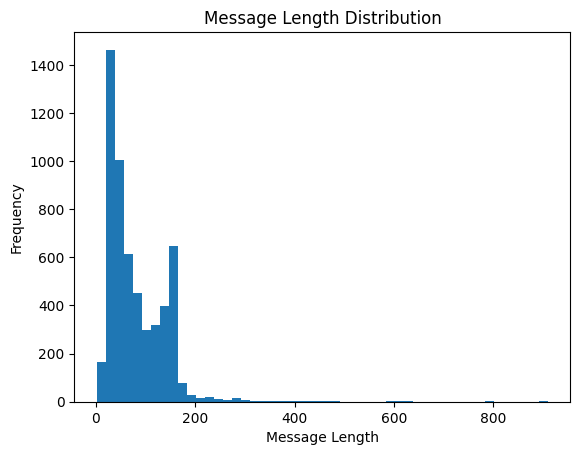

In [17]:
data['length'] = data['message'].apply(len)

plt.hist(data['length'], bins=50)
plt.title("Message Length Distribution")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()


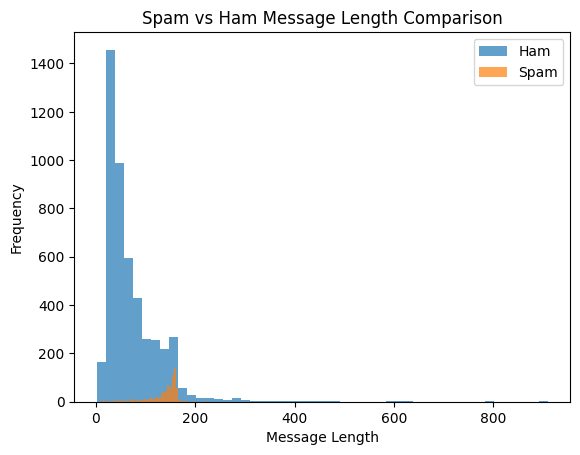

In [18]:
spam_len = data[data['label']=='spam']['length']
ham_len = data[data['label']=='ham']['length']

plt.hist(ham_len, bins=50, alpha=0.7, label='Ham')
plt.hist(spam_len, bins=50, alpha=0.7, label='Spam')
plt.legend()
plt.title("Spam vs Ham Message Length Comparison")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


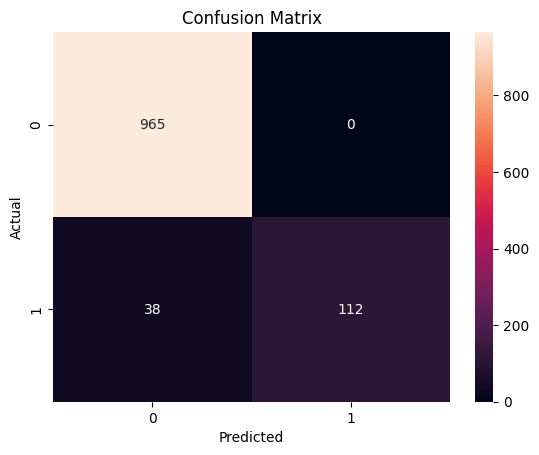

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


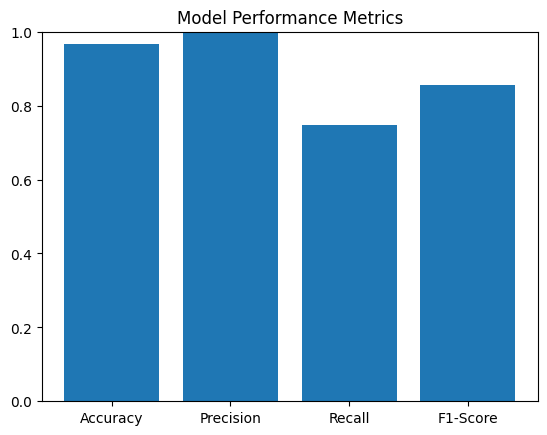

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred)
}

plt.bar(metrics.keys(), metrics.values())
plt.title("Model Performance Metrics")
plt.ylim(0,1)
plt.show()


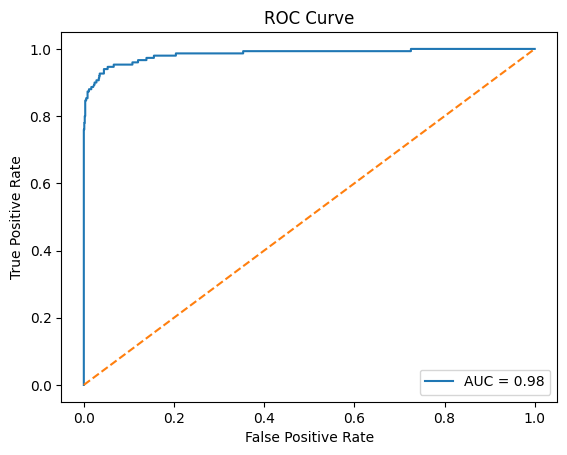

In [23]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## 🧪 Simulation Interface (Widgets Enabled)

In [25]:

text_input = widgets.Textarea(
    value='',
    placeholder='Type email message here...',
    description='Message:',
    layout=widgets.Layout(width='750px', height='120px')
)

check_button = widgets.Button(
    description='Check Spam',
    button_style='success'
)

output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        msg = text_input.value
        
        if msg.strip() == "":
            print("⚠️ Please enter a message")
            return
        
        clean = preprocess(msg)
        vec = tfidf.transform([clean]).toarray()
        pred = model.predict(vec)
        
        if pred[0] == 1:
            print("🚨 Result: SPAM MESSAGE")
        else:
            print("✅ Result: NOT SPAM MESSAGE")

check_button.on_click(on_button_clicked)

display(text_input, check_button, output)


Textarea(value='', description='Message:', layout=Layout(height='120px', width='750px'), placeholder='Type ema…

Button(button_style='success', description='Check Spam', style=ButtonStyle())

Output()


## Conclusion
This notebook correctly enables **ipywidgets** and demonstrates
a fully interactive Spam Detection Simulation Application.
